
# SIR model


In the following we analys a much simpler model not taking into account neither the mortality rate nor the birth rate (assume they are more or less equal). The key point is the knowledge of $I(0)$, $a$. Assume that we do not loose anyone, so the total population is constant. This reduces to the simple system:
\begin{align}
\dot{S}(t)&=-a S(t)\cdot I(t)+c\cdot R(t)-d\cdot S(t)\\
\dot{I}(t)&=a S(t)\cdot I(t)-b\cdot I(t)\\
\dot{R}(t)&=b\cdot I(t)-c\cdot R(t)+d\cdot S(t)\\
\end{align}

Using the slider widget to control visual properties of our plot.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.integrate import odeint # Scipy integrate is for numerical integration, odeint is self explaining

# Markup cell

In [2]:
# Update the values to plot
# 
def update(val):
    pos=odeint(funcupdate,n0,t)
    ls.set_ydata(pos.T[0])
    li.set_ydata(pos.T[1])
    lr.set_ydata(pos.T[2])
    fig.canvas.draw_idle()
# Reset the parameters
def reset(event):
    sinf.reset()
    srec.reset()
    ssus.reset()
    svac.reset()
#
def funcupdate(n,t):
    s,i,r=n
    a=sinf.val      # rate of infection
    b=srec.val      # rate of recovery
    c=ssus.val      # rate of suszeptibility
    d=svac.val      # rate of vaccination
    # here you enter the differential equation system
    dsdt=-a*s*i+c*r-d*s
    didt=a*s*i-b*i
    drdt=b*i-c*r+d*s
    #
    return dsdt,didt,drdt
#
def func(n,t):
    s,i,r=n  
    # here you enter the differential equation system
    dsdt=-a*s*i+c*r-d*s
    didt=a*s*i-b*i
    drdt=b*i-c*r+d*s
    #
    return dsdt,didt,drdt

In [3]:
# here you integrate the DE and make a side by side plot
# The parameters are taken from the example in https://de.wikipedia.org/wiki/SIR-Modell
# for c=0. and d=0.
#
a0=0.0004      # rate of infection
b0=0.04        # rate of recovery
c0=0.          # rate of suszeptibility
d0=0.          # rate of vaccination
a,b,c,d=a0,b0,c0,d0
s0=1000.
i0=3.
#eps= 0.1   # I(0) see above
n0=[s0-i0,i0,0.]   # [s0,i0, r0]
nsteps=10000
tini=0.
tend=100.
t=np.linspace(tini,tend,nsteps)  # We do nsteps steps in the iterval [tini,tend]
pos=odeint(func,n0,t) # Integrate the system of differential equations
#endtime=time.time()
#print("{} s".format(endtime-starttime))

<IPython.core.display.Javascript object>


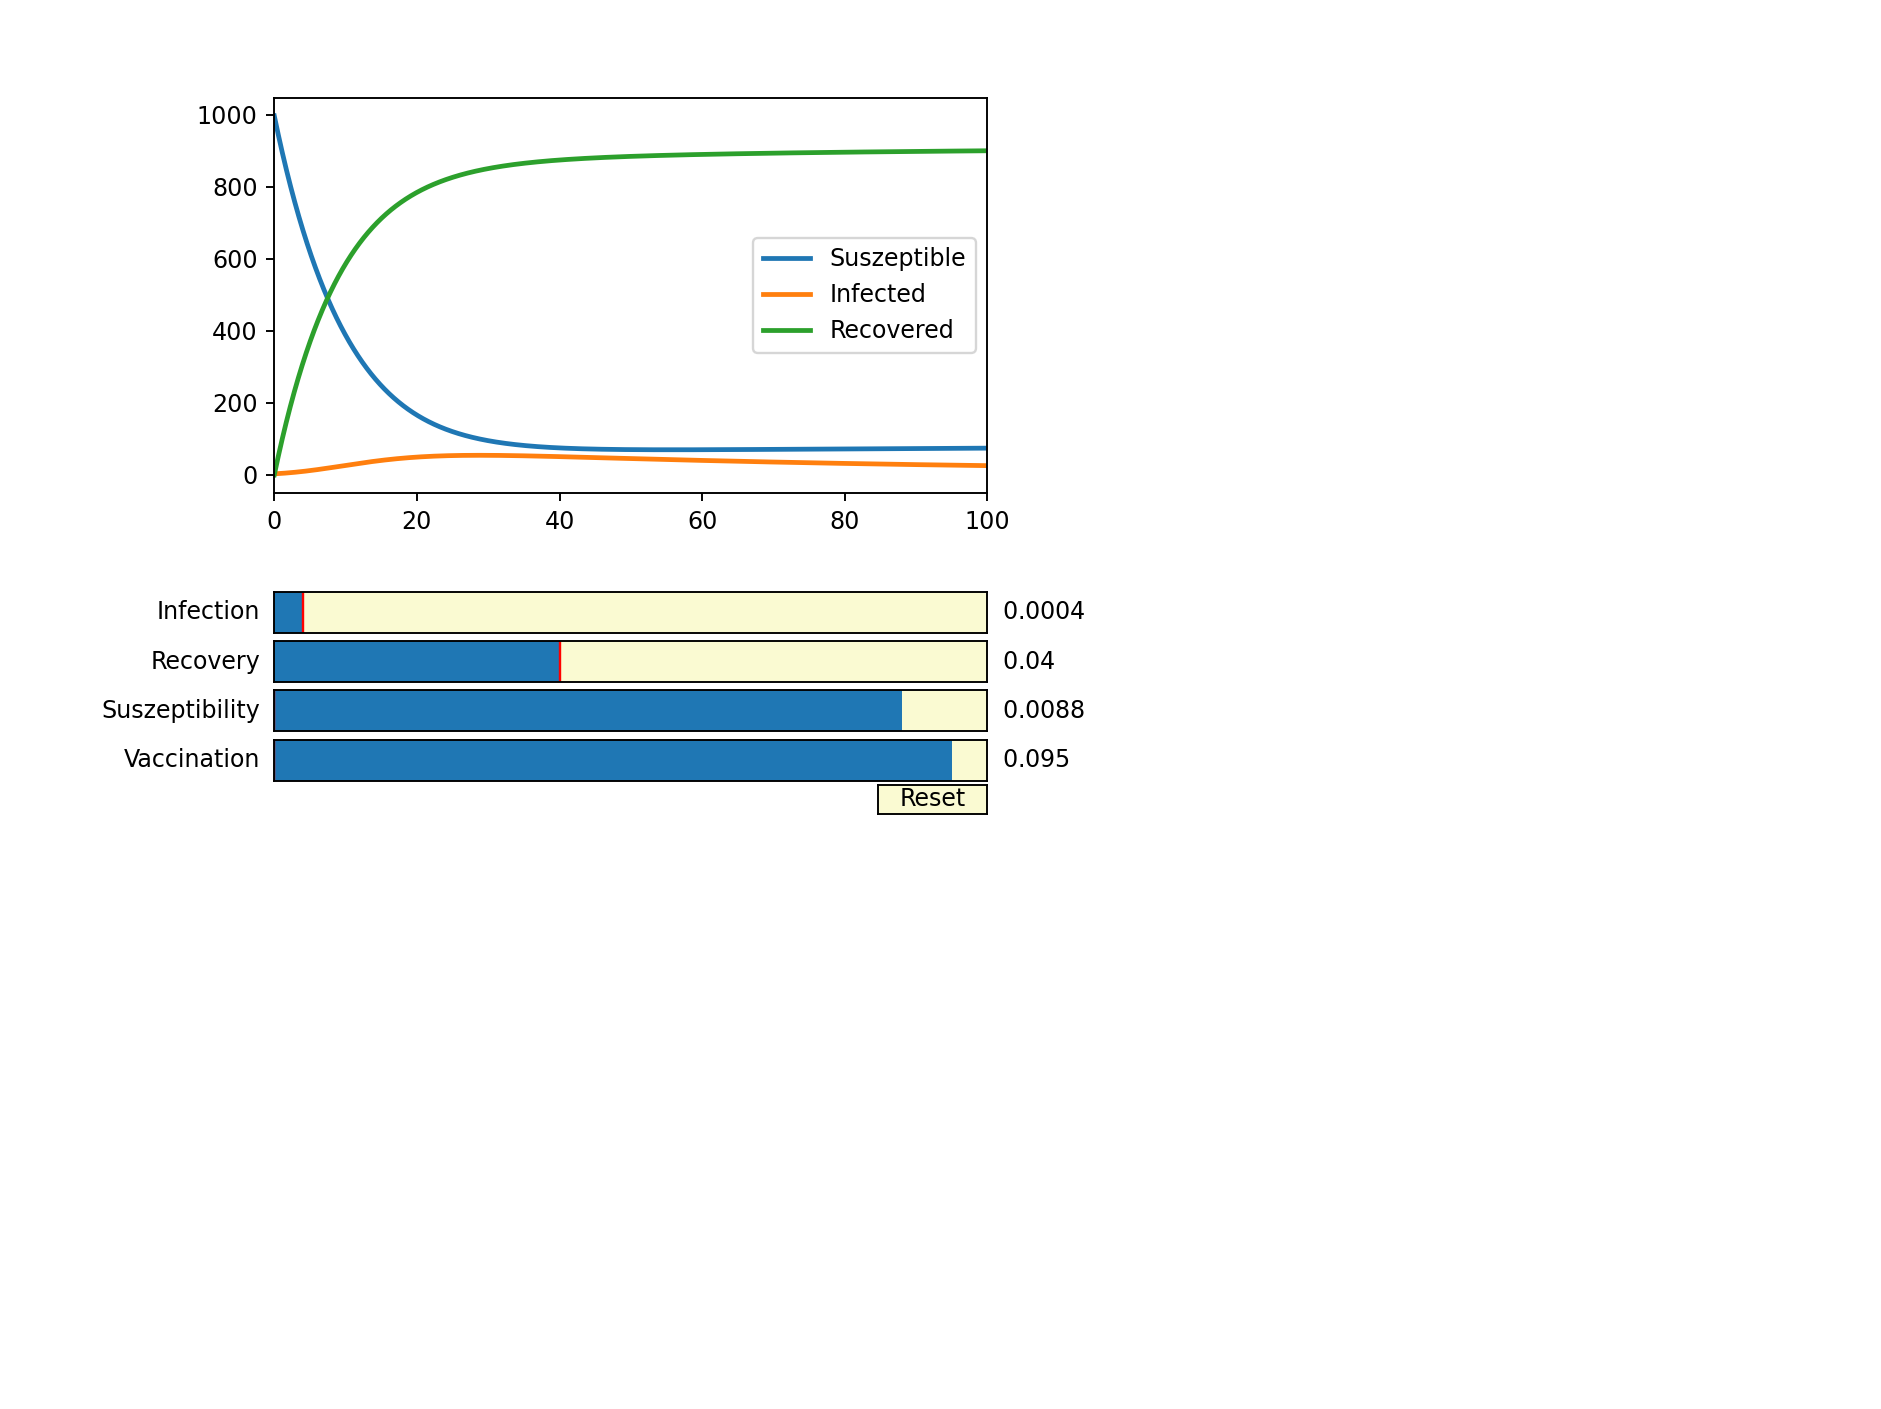

In [4]:
%matplotlib notebook
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.4)
#
s=pos.T[0]
i=pos.T[1]
r=pos.T[2]
#
ls, = plt.plot(t,s, lw=2, label='Suszeptible')
li, = plt.plot(t,i, lw=2, label='Infected')
lr, = plt.plot(t,r, lw=2, label='Recovered')
#ax.plot(t,s,lw=2)
plt.legend()
ax.margins(x=0)
#
axcolor = 'lightgoldenrodyellow'
# rectangles for sliders
axinf = plt.axes([0.25, 0.23, 0.65, 0.05], facecolor=axcolor)
axrec = plt.axes([0.25, 0.17, 0.65, 0.05], facecolor=axcolor)
axsus = plt.axes([0.25, 0.11, 0.65, 0.05], facecolor=axcolor)
axvac = plt.axes([0.25, 0.05, 0.65, 0.05], facecolor=axcolor)
# Define a slider for the dependent variables
# 
sinf = Slider(axinf, 'Infection', 0., .01, valinit=a0, valstep=0.0004)
srec = Slider(axrec, 'Recovery', 0., .1, valinit=b0, valstep=0.005)
ssus = Slider(axsus, 'Suszeptibility', 0., .01, valinit=c0, valstep=0.0004)
svac = Slider(axvac, 'Vaccination', 0., .1, valinit=d0, valstep=0.005)
#
sinf.on_changed(update)
srec.on_changed(update)
ssus.on_changed(update)
svac.on_changed(update)
#samp.on_changed(update)
#
resetax = plt.axes([0.8, 0.01, 0.1, 0.035])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
button.on_clicked(reset)
#
plt.show()

In [ ]:
np.linspace(0,1.,11)

# Dies ist eine markdown cell
Hier kann man Text schreiben.

1. Erstes Element
1. Zweites

- Erstes
* Zweites

Hier steht LaTeX code
\begin{align}
\dot{S}(t)&=-a S(t)\cdot I(t)+c\cdot R(t)-d\cdot S(t)\\
\dot{I}(t)&=a S(t)\cdot I(t)-b\cdot I(t)\\
\dot{R}(t)&=b\cdot I(t)-c\cdot R(t)+d\cdot S(t)\\
\end{align}


Eine Anleitung und auch etwas übe LaTeX findet sich hier:

https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

oder jurz und knapp hier:

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

<IPython.core.display.Javascript object>


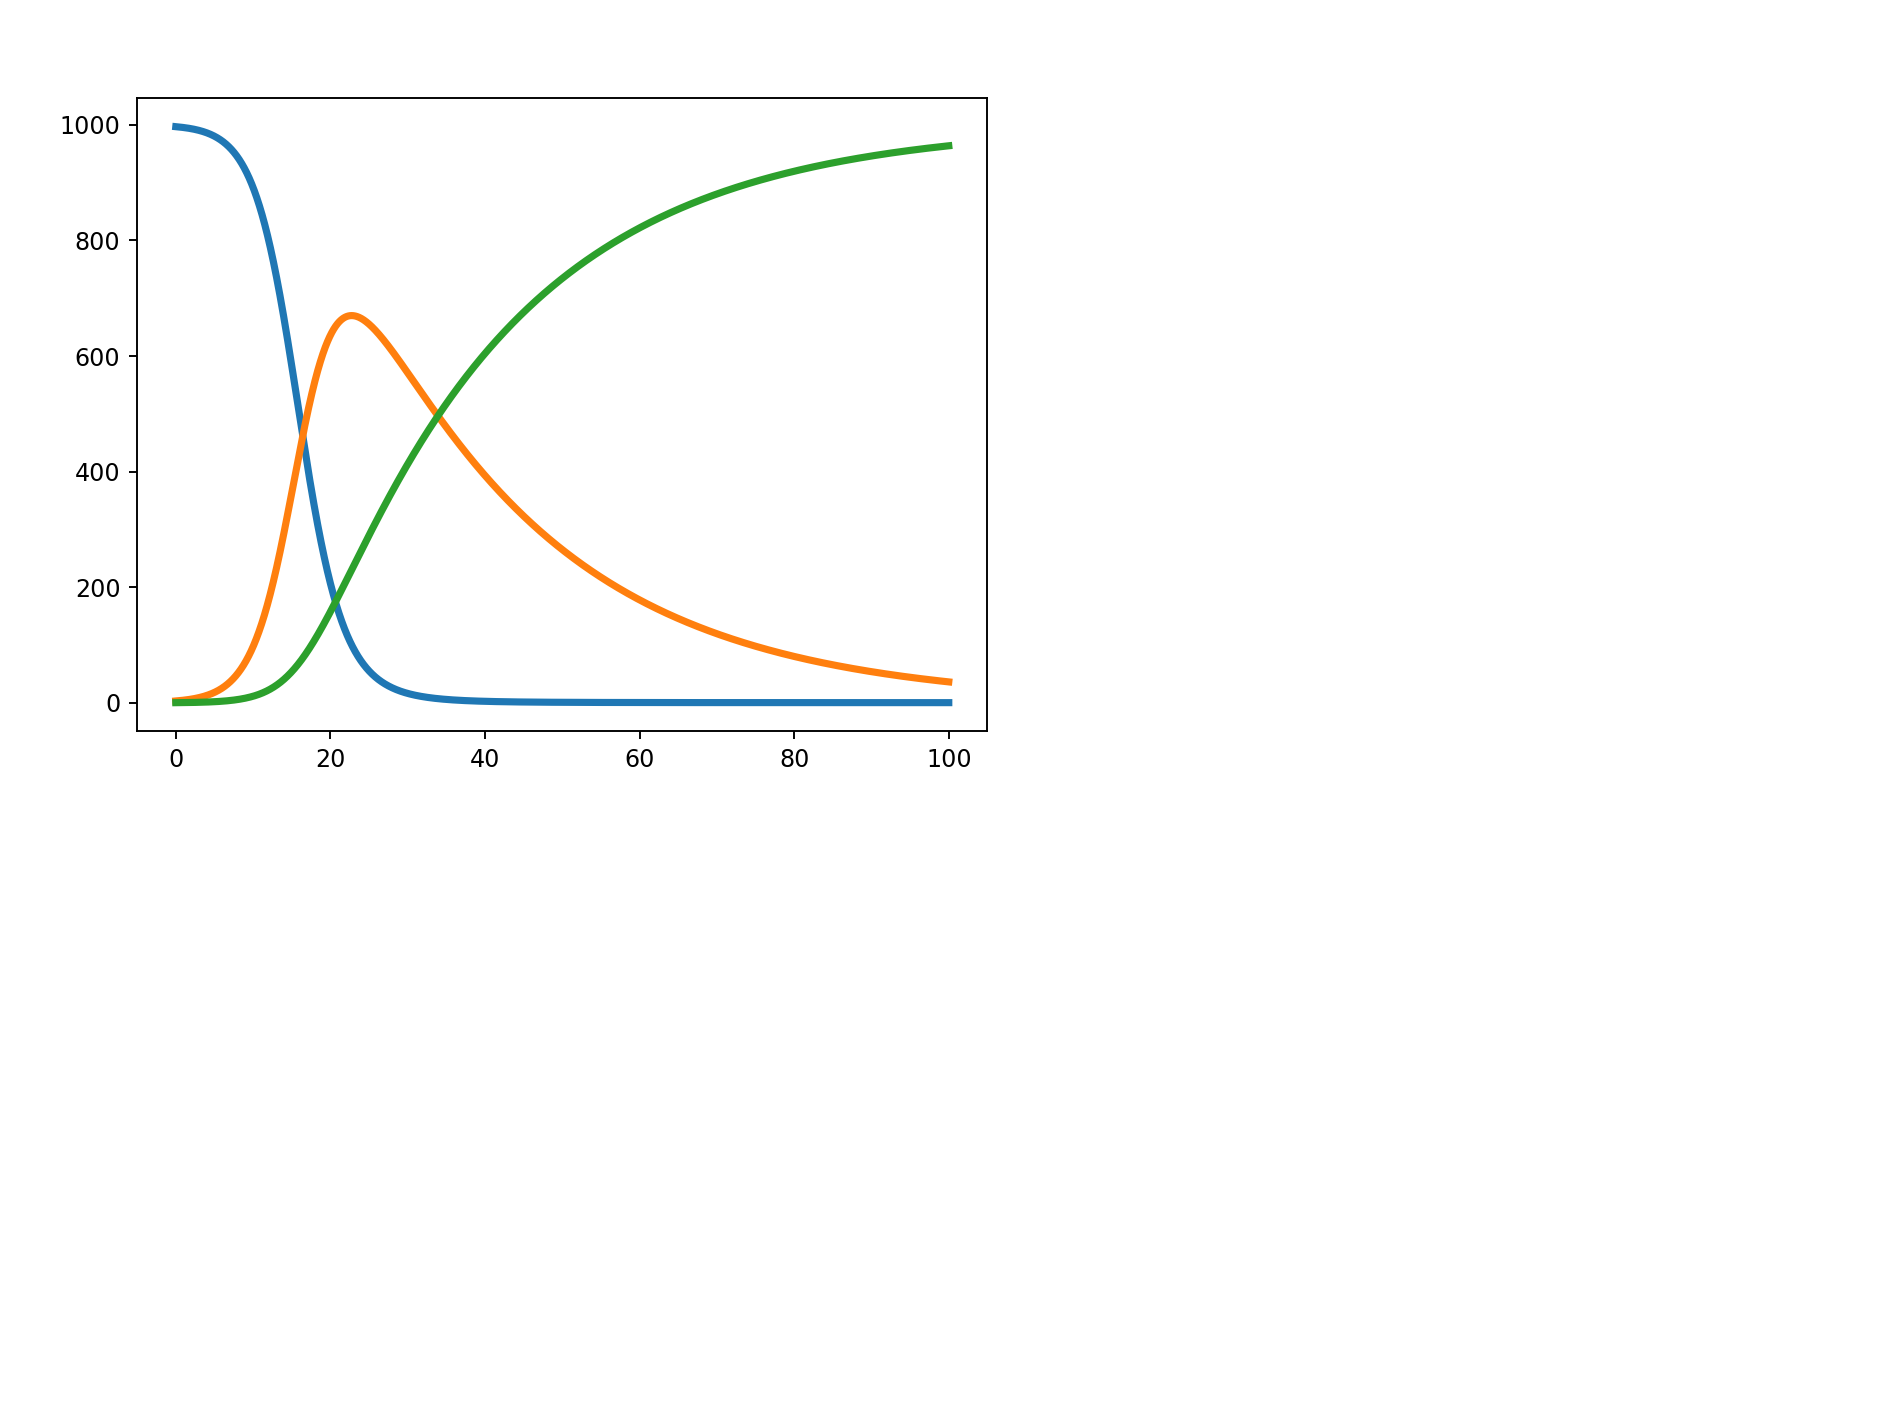

In [31]:
%matplotlib notebook
for i in np.arange(3):
    plt.plot(t,pos.T[i],lw=3)
plt.show()

u=5